In [1]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>
<link rel="stylesheet" href="stylefiles/presentation.css"/> 

<section id="title-slide"> 
    <br><br><br><h1><i>Distances and Vectorization</i></h1>
    <h3><i>Module 1-4</i></h3>
    <br><br>
    <h4><i>5/15/2023</i></h4>
    <br><br>
    <div class="uu_title_container">
        <smaller>
        <div>
            <b>Presented by:</b> Danielle Barnes
            <br><br><br><br>
            <b>Topological Signal Processing for Dynamical Systems</b><br>
            SIAM-DS Minitutorial 2023
        </div>  
        </smaller>
    </div><br>
    <div class='footer'>
        Michigan State University
    </div>
</section>


<div class = 'row'>

# Visual Abstract     
    
<img src = 'figures/big_picture.png' width = 80% height = auto>
    
</div>

## Goals of this module

- Define the Bottleneck and Wasserstein Distances for persistence diagrams 
- Give some examples of vectorization of persistence diagrams for use in machine learning applications 


# Distances for Persistence Diagrams


# Matchings




<div class = 'row'>
<div class = 'column'>

## Definition 

- A *(partial) matching* between two diagrams $\varphi:D_1 \rightsquigarrow D_2$ is a bijection on a subset of the off diagonal points: 
$$
\begin{matrix}
\varphi: & S_1 & \longrightarrow & S_2 
\end{matrix}
$$     
where $S_1 \subseteq D_1$ and $S_2 \subseteq D_2$.
    
- A matching defines two types of points:
  - Matched points: 
    $$S_1 \cup S_2$$
  - Unmatched points:
    $$\left(D_1 \setminus S_1\right) \cup \left(D_2 \setminus S_2\right)$$

- Unmatched points can be viewed as being matched to the diagonal $\Delta = \{ (x,x) \mid x \in \mathbb{R}\}$.
   
</div>
<div class = 'column'>
    
## Example
    
<!--      -->
    
<div class = 'row'>
<div class = 'column'>

<img src = 'figures/PersistenceDiagram-WassComputation-Bad.png' width = 80% height = auto>

- Matched: $(x,c)$, $(y,d)$
- Unmatched blue: $z$
- Unmatched purple: $a$, $b$
</div>
<div class = 'column'>

<img src = 'figures/PersistenceDiagram-WassComputation-Good.png' width = 80% height = auto>
 
- Matched: $(x,b)$, $(y,c)$
- Unmatched blue: $z$
- Unmatched purple: $a$, $d$   
</div>
</div>
<!--      -->
    
</div>
</div>

To define distances between two persistence diagrams, we first introduce the concept of matching.  For each point in the diagrams, a matching to either a point in the other diagram or a matching to the diagonal is defined.  First, a matching is constructed on a subset of points from each diagram, where the subsets have the same number of points.  Then the unmatched points are considered to be matched to the diagonal.  In the example on the right we see two different matchings for the same persistence diagrams.  Note that in both matches there are two points from each diagram matched, with the rest matched to the diagonal.

## Scoring a matching


<div class = 'row'>
<div class = 'column'>

## Definition 

Given a matching $\varphi:D_1 \rightsquigarrow D_2$,  we have the distance between a point and its match: 
- For matched points: 
    $$\{ \|p - \varphi(p)\|_\infty \mid  p \in S_1\}$$
- For unmatched points: 
    $$\left\{ \tfrac{1}{2}(p_2-p_1) \mid  p = (p_1,p_2) \in \left(D_1 \setminus S_1\right) \cup \left(D_2 \setminus S_2\right)\right\}$$
    *Note that the score for unmatched points can be viewed as the distance to the closest point on the diagonal $\|p - \Delta\|_\infty$*
    
Then the score of a given matching  is defined as 
\begin{align}
\mathrm{Score}_\infty(\varphi) = \max & \left \{ \|p - \varphi(p)\|_\infty \mid  p \in S_1 \right\}\\ 
        &\cup \left\{\|p - \Delta\|_\infty \mid  p \in \left(D_1 \setminus S_1\right) \cup \left(D_2 \setminus S_2\right)\right\} 
\end{align}





   
</div>
<div class = 'column'>
    
## Example
    
<!--      -->
    
<div class = 'row'>
<div class = 'column'>

<img src = 'figures/PersistenceDiagram-WassComputation-Bad.png' width = 80% height = auto>

<!-- - Matched: $(x,c)$, $(y,d)$
- Unmatched blue: $z$
- Unmatched purple: $a$, $b$ -->
- **${\mathrm{Score}_\infty(\varphi)= \|x-c\|_\infty}$**
</div>
<div class = 'column'>

<img src = 'figures/PersistenceDiagram-WassComputation-Good.png' width = 80% height = auto>
 
<!-- - Matched: $(x,b)$, $(y,c)$
- Unmatched blue: $z$
- Unmatched purple: $a$, $d$    -->
- **$\mathrm{Score}_\infty(\varphi)= \|y-c\|_\infty$**
</div>
</div>
<!--      -->
    
</div>
</div>


The goal of matching is to be able to define a scoring, and next a distance for the particular matching.  Given a particular matching, we define the score as either the maximum distance between points for matched points, or the maximum distance between unmatched points and the diagonal, whichever is greater.  In the example on the right, the score of the matching on the left is greater than the matching on the right.

## Bottleneck Distance 


<div class = 'row'>
<div class = 'column'>

## Definition 




The bottleneck distance between two given diagrams is 
    $$d_B(D_1,D_2) = \inf_ {\varphi:D_1 \rightsquigarrow D_2} \left(\mathrm{Score}_\infty (\varphi)\right)$$


   
</div>
<div class = 'column'>
    
## Example
    
<!--      -->
    
<div class = 'row'>
<div class = 'column'>

<img src = 'figures/PersistenceDiagram-WassComputation-Bad.png' width = 80% height = auto>


</div>
<div class = 'column'>

<img src = 'figures/PersistenceDiagram-WassComputation-Good.png' width = 80% height = auto>
 
This matching has a lower score than the one at left.
</div>
</div>
<!--      -->
    
</div>
</div>


Next to define a distance on the matching, the bottleneck distance, we take the maximum score over different matchings, where the matching minimizes the score.  In the example, we see the matching on the right has a lower score than the matching on the left.  Assuming the matching on the right is the matching that produces the minimum score, the bottleneck distance would then be the distance between y and c.

# Stability


<div class = 'row'>
<div class = 'column'>


## Theorem (Cohen-Steiner *et al.* 2007)
    
Let $\mathbb{X}$ be a triangulable space with continuous tame functions $f,g: \mathbb{X} \to \mathbb{R}$. Then the persistence diagrams $D(f)$ and $D(g)$ satisfy 
    $$
    d_B(D(f),D(g)) \leq \|f-g\|_\infty.
    $$

## Why do we care? 
    
- Small noise perturbation results in small $\|f-g\|_\infty$ results in small bottleneck distance.
- Similar input data results in similar persistence diagram representations.
   
</div>
<div class = 'column'>
    
## Example

![](figures/persistence_stability.gif)
    
</div>
</div>

This is important as the bottleneck distance becomes a stable, bounded metric to describe distances between persistence diagrams.  The bottleneck distance between the persistence diagrams of two functions is bounded by the difference between the function values.  As such, features are robust to noise, and similar input data results in similar persistence diagram representations.  We see on the right a point cloud with a cycle as a feature, and the point representing that feature is quite stable.

## Wasserstein Distance 


<div class = 'row'>
<div class = 'column'>

## Definition 

Given a matching $\varphi:D_1 \rightsquigarrow D_2$, the $q$-th Wasserstein score $\mathrm{Score}_q(\varphi)$ is defined as using the following scores for each individual point
- For matched points: 
    $$\{ \|p - \varphi(p)\|_q \mid  p \in S_1\}$$
- For unmatched points: 
    $$\left\{ \|p - \Delta \|_q \mid  p = (p_1,p_2) \in \left(D_1 \setminus S_1\right) \cup \left(D_2 \setminus S_2\right)\right\}$$
    
The score of a matching is 
$$
 \mathrm{Score}_q(\varphi) = \left(\sum_{p \in S_1} \|p - \varphi(p)\|_q^q + \sum_{p \in U } \|p - \Delta\|_q^q \right)^{1/q}
$$
where $U = \left(D_1 \setminus S_1\right) \cup \left(D_2 \setminus S_2\right)$ is the set of unmatched points.
    
The $q$-th Wasserstein distance between two given diagrams is 
    $$d_{W_q}(D_1,D_2) = \inf_ {\varphi:D_1 \rightsquigarrow D_2} \mathrm{Score}_q(\varphi)$$


   
</div>
<div class = 'column'>
    
## Example
    
<!--      -->
    
<div class = 'row'>
<div class = 'column'>

<img src = 'figures/PersistenceDiagram-WassComputation-Bad.png' width = 80% height = auto>


</div>
<div class = 'column'>

<img src = 'figures/PersistenceDiagram-WassComputation-Good.png' width = 80% height = auto>
 
This matching still has the lower cost of the two, but now it has contributions from all drawn edges, not just the longest one.
</div>
</div>
<!--      -->
    
</div>
</div>


Another commonly used metric is the Wassterstein distance, which instead of using the L-infinity norm, is defined by a parameter q, and each matching contributes to the Wasserstein distance.  The q-th Wasserstein distance bertween two given diagrams is similar to the bottleneck distance in that we minimize the score over the set of matchings.  It is of note that both the Bottleneck and Wasserstein distance are not the same as the Hausdorff distance.  The Hausdorff distance provides a metric based on the maximum distance between any two points, whereas both the bottleneck and wassterstein minimize a function over a the set of possible matchings between diagrams.

## Code example

This code is available in teaspoon, and originally is from the [scikit-learn persim package](https://github.com/scikit-tda/persim).

In [1]:
from ripser import ripser
from teaspoon.MakeData.PointCloud import Torus, Annulus, Cube, Clusters, Sphere
import numpy as np
from teaspoon.TDA.Distance import wassersteinDist, bottleneckDist
numPts = 50
seed = 0

# Generate Torus
t = Torus(N=numPts,seed = seed)

# Generate Annulus
a = Annulus(N=numPts,seed = seed)

# Compute persistence diagrams
PD1 = ripser(t,2)['dgms'][1]
PD2 = ripser(a,1)['dgms'][1]
wassersteinDist(PD1,PD2,p = 2, q = 2)

0.90517013950766

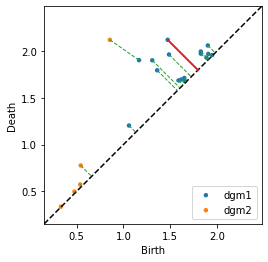

In [2]:
bottleneck, matching = bottleneckDist(PD1, PD2, matching=True, plot=True)

We see in the diagram above, the red line indicates the bottleneck distance.  This code is available in teaspoon, and is orginially in the persim package linked above.

# Vectorization Methods for Persistence Diagrams


# Vectorization




<div class = 'row'>
<div class = 'column'>

## Definition 

- *Vectorization* of persistence diagrams is a mapping from the set of persistence diagrams to $\mathbb{R}$.

- Many methods exist such as:
    - Adcock-Carlsson Coordinates
    - Template Functions (Tent Functions)
    - Persistence Images
    - Persistence Landscapes
    
## Why do we care?
    
It gives us a way to use information from persistence diagrams in machine learning models.  The mapping from the space of persistence diagrams to real-valued vector(s) creates features that can then be used for prediction of a response variable.
    
   
</div>
<div class = 'column'> 
    
## Examples
    
<div class = 'row'>
<div class = 'column'>

### Persistence Images
<img src = 'figures/1-4_persistence_images.jpg' width = 100% height = auto>


</div>
    
<div class = 'column'>
    
### Template Functions
<img src = 'figures/1-4_template_functions.png' width = 100% height = auto>
  
</div>
</div>


[Barnes, Danielle, Luis Polanco, and Jose Perea, A Comparative Study of Machine Learning Methods for Persistence Diagrams, Frontiers in Artificial Intelligence](https://www.frontiersin.org/articles/10.3389/frai.2021.681174/full)

We cannot use information from persistence diagrams directly in machine learning or statistical models, so various vectorization, or featurization, methods exist that allow the creation of real-valued vectors that can then be used as features for model training.  In the example images on the right, we see two different types of featurization methods, Persistence Images and Template Functions.  For information on different features, what types of datasets the features could be useful on, and code examples, please check out the paper link referenced above.

# Adcock-Carlsson Coordinates

The main idea of Adcock-Carlsson coordinates is from the fact that any persistence diagram with exactly $n$ points can be described by a vector of the form $(x_1, y_1, x_2, y_2, \dots, x_n, y_n)$ where $x_i$ denotes the birth of the $i$-th class and $y_i$ the corresponding death time. 


### Definition
These are the features we call *Adcock-Carlsson coordinates*.

While seemingly complex, some of the most frequently used Adcock-Carlsson Coordinates are simpler and easy to compute:

- $\sum\limits_i x_i(y_i - x_i)$
- $\sum\limits_i (y_{max} - y_i)(y_i - x_i)$
- $\sum\limits_i x_i^2(y_i - x_i)^4$
- $\sum\limits_i (y_{max} - y_i)^2(y_i - x_i)^4$. 

[Adcock, A., Carlsson, E., and Carlsson, G. (2016). The Ring of Algebraic Functions on Persistence Bar Codes. Homology, Homotopy Appl. 18, 381–402. doi:10.4310/hha.2016.v18.n1.a21](https://www.intlpress.com/site/pub/pages/journals/items/hha/content/vols/0018/0001/a021/)

<div class = 'row'>
<div class = 'column'>
    
## Tent Functions

In the birth-lifetime plane, and given a point $\mathbf{x} = (a,b) \in \mathbb{W}$ and a discretization scale $ 0 < \delta <b$, we can define a tent function on $\mathbb{W}$ by 
<p style="text-align: center;"> $g_{\mathbf{x},\delta}(x,y) = |1 - \frac{1}{\delta}$max$\{|x-a|,|y-b|\}|_+$</p>

where $|r |_+ = \max\{0, r\}$. 
As $\delta < b$, this function has support in the compact box $[a - \delta, a + \delta] \times [b - \delta, b+\delta] \subset 
\mathbb{W}$.  

Given a persistence diagram $D \in \mathcal{D}$ in birth-death coordinates, 
the value of the tent function is  
<p style="text-align: center;"> $G_{\mathbf{x},\delta}(D) = 
\sum_{(x,y) \in D}   g_{\mathbf{x},\delta}(x, y-x)$</p>
</div>

### Tent Function at point (4,6)
    
<div class = 'column'>
<div class = 'column'>

### Tent Functions in Birth-Death Coordinates
<img src = 'figures/1-4_img_tent_functions_bd.png' width = 100% height = auto>


</div>
    
<div class = 'column'>
    
### Tent Functions in Birth-Lifetime Coordinates
<img src = 'figures/1-4_img_tent_functions_bl.png' width = 100% height = auto>
  
</div>
</div>


</div>

[Perea, J. A., Munch, A., and Khasawneh, F. A. (2019). Approximating Continuous Functions on Persistence Diagrams Using Template Functions.CoRR abs/1902.07190](https://arxiv.org/abs/1902.07190)


We provide an example of one vectorization method, using Template Functions, and specifically in this example Tent Functions.  To create features using Tent functions, for each point in a persistence diagram, compute a function value defined by a point and a discretization scale, delta.  On the right we see examples of the function values for the point (4,6), with delta = 2.  The feature for a persistence diagram defined with a given point and delta is then the sum of the values of each point in the diagram.  To create multiple features for use in machine learning models, a grid can be used to define different points for function evaluation.  This collection of tent functions is useful as it separates points in the persistence diagram, providing useful features for predictive tasks.

### Code Example

The following code creates features using the template functions featurization method and fits a SVM model.

In [4]:
from teaspoon.ML.PD_Classification import getPercentScore
from teaspoon.ML import feature_functions as fF
from teaspoon.ML.Base import ParameterBucket
from teaspoon.MakeData.PointCloud import testSetManifolds
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# generate persistence diagrams
DgmsDF = testSetManifolds(numDgms=20, numPts=100)
labels_col='trainingLabel'
dgm_col=['Dgm0','Dgm1']

# convert categorical labels into integers
label_encoder = LabelEncoder()
x = DgmsDF[labels_col]
y = label_encoder.fit_transform(x)
DgmsDF[labels_col] = y

# set classification parameters
params = ParameterBucket()
params.feature_function = fF.interp_polynomial
params.k_fold_cv=10
params.d = 20
params.jacobi_poly = 'cheb1'  # choose the interpolating polynomial
params.useAdaptivePart = False
params.clf_model = SVC
params.TF_Learning = False

# perform classification
c_report_train,c_report_test=getPercentScore(DgmsDF,
                                            labels_col='trainingLabel',
                                            dgm_col=dgm_col,
                                            params=params,
                                            precomputed = False,
                                            saving = False,
                                            saving_path = None)

Beginning experiments

Run Number: 1
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------
Run Number: 2
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------
Run Number: 3
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------
Run Number: 4
Test set acc.: 0.917 
Training set acc.: 1.000
------------------------------
Run Number: 5
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------
Run Number: 6
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------
Run Number: 7
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------
Run Number: 8
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------
Run Number: 9
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------
Run Number: 10
Test set acc.: 1.000 
Training set acc.: 0.991
------------------------------

Finished with training/testing experiments

Test Set 
-

The goal of vectorization, or featurization methods is to be able to use information from persistence diagrams in machine learning algorithms.  The code above provides an example to do so, and more examples of code and more information on other vectorization methods are available in the links below.

See more examples [here](https://teaspoontda.github.io/teaspoon/F_PD.html), and for interested readers, a comparison of methods is available in the paper [Barnes, Danielle, Luis Polanco, and Jose Perea, A Comparative Study of Machine Learning Methods for Persistence Diagrams, Frontiers in Artificial Intelligence](https://www.frontiersin.org/articles/10.3389/frai.2021.681174/full)